# https://offerrealize.com/plan#machinelearning

## 第1讲 Google 如何考回归模型
课程内容：欢迎来到机器学习世界！这一节我们将介绍如何利用数据教会机器学习。如何将真实世界的问题建模为正确类别的机器学习问题。还包括机器学习的基本术语，例如假设空间、归纳偏好等。然后，我们介绍回归问题， 它是一类用于预测连续变量的监督学习模型。真实世界中，股价的预测，温度湿度的预测等都是回归问题。本节将介绍一系列经典的回归模型，包括linear regression， 岭回归，Lasso 回归，GBDT regression 等。

1.如何建模Youtube的CTR提升问题，search engine 的拼写填充问题？

2.岭回归和lasso 回归的本质是什么？各有什么优劣势？

3.GBDT是怎么解决回归问题的？为什么是在boosting gradient ？

4.R square 和 adjusted R square有什么区别？

### 1. 如何建模Youtube的CTR提升问题，search engine 的拼写填充问题？

#### **Youtube的CTR（点击率）提升问题**

这是一个典型的**监督学习中的分类问题（更具体地说是二元分类问题）**。

* **问题目标**: 预测用户是否会点击一个被推荐的视频。
* **如何建模**:
    * **标签 (Label)**: 用户的行为被定义为两个类别：`点击 (Click)` 或 `未点击 (No Click)`。我们可以用 `1` 代表点击，`0` 代表未点击。
    * **特征 (Features)**: 为了预测用户是否会点击，我们需要收集大量与用户、视频和上下文相关的信息作为特征。这些特征可以分为以下几类：
        * **用户特征**:
            * 用户的人口统计学信息（年龄、性别、地理位置等）。
            * 用户的历史行为（观看历史、搜索历史、点赞/订阅的频道、观看时长偏好）。
            * 用户的兴趣标签（根据历史行为生成的兴趣图谱）。
        * **视频特征**:
            * 视频的元数据（标题、描述、标签、分类）。
            * 视频的内容特征（从视频封面、音频、视频帧中提取的特征，例如缩略图的鲜艳度、是否包含人脸）。
            * 视频的统计特征（发布时间、当前观看次数、点赞数、评论数）。
        * **上下文特征**:
            * 用户访问Youtube的时间（是工作日还是周末，是白天还是晚上）。
            * 用户使用的设备（手机、电脑、电视）。
            * 推荐的来源（是首页推荐、还是相关视频推荐）。
    * **模型选择**: 可以选择能够处理大规模稀疏特征并进行非线性关系建模的模型。业界常用的模型包括：
        * **逻辑回归 (Logistic Regression)**: 简单、可解释性强，常作为基线模型。
        * **深度神经网络 (Deep Neural Networks, DNN)**: 例如YouTube自己开发的包含嵌入层和多层感知机（MLP）的推荐系统模型，能有效学习特征之间的复杂交互关系。
        * **梯度提升决策树 (GBDT)**: 如XGBoost或LightGBM，对于结构化数据有很好的效果。
* **目标函数**: 模型的优化目标是最大化预测准确性，通常使用**对数损失函数 (Log Loss)** 或 **交叉熵 (Cross-Entropy)** 作为损失函数进行优化。

#### **Search Engine的拼写填充/纠错 (Spelling Correction) 问题**

这个问题可以被建模为**自然语言处理 (NLP) 中的序列到序列 (Sequence-to-Sequence) 问题**，或者更简单地看作一个**排序 (Ranking) 问题**。

* **问题目标**: 对于用户输入的一个可能有拼写错误的查询词（query），系统需要返回最可能正确的拼写形式。
* **如何建模**:
    * **方法一：基于排序的模型 (Ranking Model)**
        1.  **生成候选词 (Candidate Generation)**: 当用户输入一个词（如 "mchine leanring"）时，系统首先会根据一些规则生成一个候选词集合。生成规则包括：
            * **编辑距离 (Edit Distance)**: 找出与原词只有一个或两个编辑距离（增、删、改、换位）的词（如 "machine learning", "machine leaning"）。
            * **发音相似度 (Phonetic Similarity)**: 找出读音相似的词。
            * **N-gram模型**: 基于海量搜索日志，找出经常一起出现的词语组合。
        2.  **候选词排序 (Candidate Ranking)**: 接下来，模型需要对所有候选词进行打分，选出分数最高的作为最佳纠正。这个打分过程可以看作一个机器学习问题。
            * **特征**:
                * **语言模型概率 $P(candidate)$**: 这个候选词本身在语言中出现的频率有多高？（例如, "machine learning" 的概率远高于 "machine leaning"）。
                * **错误模型概率 $P(query | candidate)$**: 用户想输入正确的`candidate`，却输成了错误的`query`的概率有多大？这可以从用户的历史纠错行为中学习。
                * **上下文特征**: 如果有上下文信息（例如之前的查询），也可以作为特征。
            * **模型**: 可以使用一个简单的加权模型，或者训练一个如RankSVM、LambdaMART等更复杂的排序模型。
    * **方法二：序列到序列模型 (Seq2Seq Model)**
        * 这是一个更现代、更强大的方法。它将输入的错误序列（"m-c-h-i-n-e l-e-a-n-r-i-n-g"）直接映射到正确的输出序列（"m-a-c-h-i-n-e l-e-a-r-n-i-n-g"）。
        * **模型架构**: 通常使用带有注意力机制 (Attention Mechanism) 的编码器-解码器 (Encoder-Decoder) 模型，如Transformer。
        * **训练数据**: 需要大量的 "错误查询 -> 正确查询" 数据对进行监督学习。这些数据可以从用户的搜索日志中挖掘得到（例如，用户输入一个查询后很快又用一个拼写相似的查询重新搜索）。

### 2. 岭回归和Lasso回归的本质是什么？各有什么优劣势？

岭回归 (Ridge Regression) 和 Lasso 回归 (Least Absolute Shrinkage and Selection Operator) 都是线性回归的扩展，它们的本质都是通过在损失函数中加入 **正则化项 (Regularization Term)** 来解决标准线性回归的过拟合问题。

**标准线性回归的损失函数**：
$$
J(\theta) = \sum_{i=1}^{m}(y_i - \theta^T x_i)^2
$$
**对于我当前选择的一组参数 $ \theta $，计算出模型对每一个训练样本的预测值，然后算出每个预测值与真实值差距的平方，最后把所有这些平方差距加起来，得到一个总的成本。**

#### **岭回归 (Ridge Regression)**

* **本质**: 在损失函数中加入了**L2范数正则化项**。这个正则化项是模型所有参数（权重）的平方和。
* **损失函数**:
    $$
    J(\theta)_{Ridge} = \sum_{i=1}^{m}(y_i - \theta^T x_i)^2 + \lambda \sum_{j=1}^{n}\theta_j^2
    $$
    其中，$ \lambda $ 是正则化系数，控制着正则化的强度。
* **优劣势**:
    * **优势**:
        1.  **解决过拟合**: L2正则化会惩罚过大的参数，使得模型的权重$ \theta_j $趋向于变小，但**不会变为0**。这有助于降低模型的复杂度，提高模型的泛化能力。
        2.  **处理多重共线性**: 当特征之间存在高度相关性（多重共线性）时，标准线性回归的系数会变得非常不稳定。岭回归可以通过收缩系数来稳定模型。
    * **劣势**:
        1.  **不具备特征选择能力**: 它会将所有特征的系数都缩小，但不会将任何一个系数精确地缩减到0。因此，最终模型会保留所有特征，使得模型解释性变差。
* **extra**
    * λ（正则化强度）就是这个权衡的调节器。当模型试图通过增大某个权重θ来更好地拟合一个数据点时，惩罚项 λθ就会急剧增大，从而增加总的损失。为了达到总损失的最小化，模型不得不“放弃”对个别数据点的完美拟合，选择一套整体更小、更平滑的权重。

#### **Lasso 回归 (Lasso Regression)**

* **本质**: 在损失函数中加入了**L1范数正则化项**。这个正则化项是模型所有参数（权重）的绝对值之和。
* **损失函数**:
    $$
    J(\theta)_{Lasso} = \sum_{i=1}^{m}(y_i - \theta^T x_i)^2 + \lambda \sum_{j=1}^{n}|\theta_j|
    $$
* **优劣势**:
    * **优势**:
        1.  **特征选择**: L1正则化最大的优点是它能够将一些不重要特征的系数**精确地压缩到0**。这相当于自动进行了特征选择，得到了一个更稀疏、更易于解释的模型。
    * **劣势**:
        1.  **多重共线性问题**: 当存在一组高度相关的特征时，Lasso倾向于随机选择其中的一个特征，并将其余特征的系数置为0。这种选择是不稳定的。
        2.  **解可能不稳定**: L1范数在原点处不可导，这给优化带来了一些挑战。

| 特性 | 岭回归 (Ridge) | Lasso 回归 |
| :--- | :--- | :--- |
| **正则化项** | L2范数 ($\lambda \sum \theta_j^2$) | L1范数 ($\lambda \sum |\theta_j|$) |
| **系数特点** | 系数被缩小，但不会为0 | 系数可以被精确压缩到0 |
| **特征选择** | 不具备 | 具备，可以产生稀疏模型 |
| **多重共线性** | 表现稳定 | 表现不稳定，会随机选择一个特征 |


| Feature           | Linear Regression                       | Logistic Regression                                  |
|:------------------|:----------------------------------------|:-----------------------------------------------------|
| **Goal**          | Predict a continuous value (Regression) | Predict a category(Classification)                   |
| **Output**        | Any number from -∞ to +∞                | A probability between 0 and 1                        |
| **Core Equation** | $ y = \theta_0 + \theta_1 x_1 + ... $   | $ p = \frac{1}{1+e^{-(\theta_0+\theta_1 x_1+...)}} $ |
| **Key Function**  | Straight Line                           | Sigmoid("S") Curve                                   |
| **Loss Function** | Mean Squared Error (MSE)                | Log Loss (Cross-Entropy)                             |
| **Use Cases**     | Predicting prices,sales,age,temperature          | Spam detaction, medical diagnosis, churn prediction  |


### 3. GBDT是怎么解决回归问题的？为什么是在boosting gradient ？

**GBDT (Gradient Boosting Decision Tree)** 是一种强大的集成学习算法，它通过迭代地训练一系列弱学习器（通常是决策树）来构建一个强学习器。

#### **GBDT如何解决回归问题？**

想象一个简单的回归任务：预测一个人的年龄。

1.  **第一棵树 (Initial Model)**: GBDT首先会训练一棵决策树（或者一个更简单的模型，比如直接预测所有样本的平均年龄）来拟合数据。这个预测肯定不完美，预测值和真实值之间会存在一个**残差 (Residual)**。
    * `残差 = 真实年龄 - 预测年龄`

2.  **第二棵树 (Fitting the Residuals)**: GBDT的核心思想来了。它不再去直接预测年龄，而是去**拟合上一轮的残差**。也就是说，它会训练第二棵决策树，这棵树的训练目标不再是样本的真实年龄，而是上一轮预测后留下的“错误”（残差）。

3.  **迭代和累加**: 这个过程会一直重复下去。每一棵新的树都在学习前面所有树加起来的预测结果所犯的错误。
    * 第 $m$ 棵树拟合的是前 $m-1$ 棵树组合预测后的残差。

4.  **最终预测**: 当训练结束后，最终的预测结果是所有树的预测值之和。
    * `最终预测 = 第一棵树的预测 + 第二棵树的预测（拟合残差）+ ... + 第N棵树的预测（拟合残差）`

通过这种方式，GBDT一步步地减少模型的整体误差，每一棵新树的加入都是为了修正前面模型的不足之处。

#### **为什么是在"Boosting Gradient"？**

上面用“残差”来解释是为了直观。在数学上，GBDT的优化过程更为通用和强大，它实际上是在**梯度下降 (Gradient Descent)** 的框架下进行的。

* **损失函数 (Loss Function)**: 对于任何一个可微分的损失函数（对于回归问题，常用的是均方误差MSE），我们可以计算出当前模型预测值关于损失函数的**负梯度 (Negative Gradient)**。
* **梯度的意义**: 在函数优化中，负梯度指向了函数值下降最快的方向。在GBDT中，这个负梯度就代表了当前模型在哪个“方向”上改进能够最大程度地减小整体损失。
* **残差是MSE的负梯度**: 一个巧妙的数学事实是，当我们使用**均方误差 (MSE)** 作为损失函数时，计算出的负梯度恰好就是我们前面所说的**残差**！
    * 损失函数: $L(y, F(x)) = \frac{1}{2}(y - F(x))^2$
    * 负梯度: $- \frac{\partial L}{\partial F(x)} = y - F(x)$ (这就是残差)
* **通用性**: GBDT的真正威力在于，它不局限于MSE损失函数。只要损失函数是可微的，我们就可以计算出它的负梯度，然后让下一棵树去拟合这个梯度。这使得GBDT可以被轻松地扩展到其他任务，比如分类任务（使用对数损失函数）和排序任务。

所以，**"Boosting Gradient" 的意思是，算法通过迭代地（Boosting）训练新的模型来拟合损失函数的负梯度（Gradient），从而使得总模型沿着梯度下降的方向不断优化，以达到最小化总损失的目的**。


### 4. R square 和 adjusted R square有什么区别？

$R^2$ (R-squared，决定系数) 和 $Adjusted \ R^2$ (调整后R方) 都是用来评估回归模型拟合优度的指标。

#### **$ R^2 $ (R-squared)**

* **定义**: $R^2$ 衡量的是因变量的变异中，能够被自变量解释的比例。它的取值范围是0到1，越接近1，说明模型的解释能力越强。
* **公式**:
    $$
    R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i}(y_i - \hat{y}_i)^2}{\sum_{i}(y_i - \bar{y})^2}
    $$
    其中，$ SS_{res} $ 是残差平方和（模型没解释的部分），$ SS_{tot} $ 是总平方和（总变异）。
* **问题**: $R^2$ 有一个显著的缺点：**当你在模型中增加任何新的自变量时，$ R^2 $ 的值只会增加或保持不变，绝不会下降**。即使这个新加入的变量与因变量毫无关系，它也可能因为偶然性使得$ R^2 $微弱上升。这会导致我们倾向于建立一个包含了过多无用变量的复杂模型，从而导致过拟合。

#### **$ Adjusted \ R^2 $ (Adjusted R-squared)**

* **定义**: 调整后R方是为了解决$ R^2 $的上述问题而生的。它在$ R^2 $的基础上考虑了模型中自变量的数量，对增加了无用变量的模型给出了“惩罚”。
* **公式**:
    $$
    Adjusted \ R^2 = 1 - (1 - R^2) \frac{n-1}{n-p-1}
    $$
    其中，$ n $ 是样本数量，$ p $ 是模型中自变量的数量。
* **特点**:
    * **惩罚机制**: 从公式可以看出，当自变量数量 $p$ 增加时，分母 $(n-p-1)$ 会变小，从而使得 $\frac{n-1}{n-p-1}$ 变大，这会给 $(1 - R^2)$ 乘以一个更大的系数，最终导致 $Adjusted \ R^2$ 的值变小。
    * **更公平的评估**: 只有当新加入的变量对模型的解释能力提升足够大（即$ R^2 $的增幅足够显著）时，$ Adjusted \ R^2 $ 才会上升。如果加入了一个无关紧要的变量，$ Adjusted \ R^2 $ 反而会下降。

**总结区别**:

| 特性 | $R^2$ (R-squared) | $Adjusted \ R^2$ (Adjusted R-squared) |
| :--- | :--- | :--- |
| **主要功能** | 衡量模型解释的变异比例 | 在前者基础上，考虑了自变量数量 |
| **对新增变量的反应** | 只会增加或不变 | 可能增加，也可能减少 |
| **用途** | 快速查看模型的整体拟合度 | 在比较包含不同数量自变量的模型时，是更公平的指标 |
| **模型选择** | 容易误导我们选择更复杂的模型 | 鼓励我们选择更简洁、有效的模型 |

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import textdistance  # A library for calculating edit distance

In [13]:
def print_header(title):
    print("\n" + "=" * 60)
    print(f"{title}")
    print("=" * 60)


# --- 1. Modeling Real-World Problems 🧠 ---
print_header("1. Modeling Real-World Problems")

# A) YouTube CTR Prediction (as a Classification Problem)
# We'll model this as predicting a binary outcome: 1 (click) or 0 (no click).

# Create a mock dataset
data_ctr = {
    'video_length_min': [2, 15, 5, 8, 12, 4],
    'user_watch_history_hours': [100, 20, 5, 50, 150, 2],
    'is_subscribed': [1, 0, 0, 1, 1, 0],
    'clicked': [1, 0, 0, 1, 1, 0]  # Our target variable
}

df_ctr = pd.DataFrame(data_ctr)

X_ctr = df_ctr[['video_length_min', 'user_watch_history_hours', 'is_subscribed']]
y_ctr = df_ctr['clicked']

# Use a simple classification model
model_ctr = LogisticRegression()
model_ctr.fit(X_ctr, y_ctr)

# Let's predict on a new data point: a user who is subscribed and has 80 hours of watch history
new_video = pd.DataFrame([{'video_length_min': 7, 'user_watch_history_hours': 80, 'is_subscribed': 1}])
pred_prob = model_ctr.predict_proba(new_video)[0][1]  # Probability of clicking

print(f"Mock CTR Data:\n{df_ctr}")
print(f"\nPrediction for a new video:")
print(f"  - Features: {new_video.iloc[0].to_dict()}")
print(f"  - Predicted Probability of Click (CTR): {pred_prob:.4f}")


1. Modeling Real-World Problems
Mock CTR Data:
   video_length_min  user_watch_history_hours  is_subscribed  clicked
0                 2                       100              1        1
1                15                        20              0        0
2                 5                         5              0        0
3                 8                        50              1        1
4                12                       150              1        1
5                 4                         2              0        0

Prediction for a new video:
  - Features: {'video_length_min': 7, 'user_watch_history_hours': 80, 'is_subscribed': 1}
  - Predicted Probability of Click (CTR): 1.0000


In [7]:
# B) Search Engine Spelling Correction (as a Ranking Problem)
print("\n" + "-" * 40)


# Model this by: 1. Generating candidates, 2. Ranking them.

def spell_corrector(word, vocabulary, language_model_freq):
    """A simple spell corrector based on candidate ranking."""
    # 1. Generate candidates with an edit distance of 1
    candidates = [c for c in vocabulary if textdistance.levenshtein(word, c) <= 2]
    # 2. Rank candidates based on their frequency (our simple "language model")
    if not candidates:
        return "No suggestion found."

    best_candidate = max(candidates, key=lambda c: language_model_freq.get(c, 0))
    return best_candidate


# A tiny vocabulary and their frequencies (simulating a language model)
vocab = ["machine", "learning", "teaches", "leopard", "leaning"]
frequencies = {"machine": 100, "learning": 95, "teaches": 50, "leopard": 20, "leaning": 5}

misspelled_word = "learnign"
correction = spell_corrector(misspelled_word, vocab, frequencies)
print(f"Misspelled word: '{misspelled_word}'")
print(f"Best correction based on ranking: '{correction}'")



----------------------------------------
2
Misspelled word: 'learnign'
Best correction based on ranking: 'No suggestion found.'


In [9]:
# --- 2. Ridge vs. Lasso Regression ⚖️ ---
print_header("2. Ridge vs. Lasso for Multicollinearity")

# Generate synthetic data with highly correlated features
np.random.seed(42)
X = np.random.rand(100, 3)
# Create a feature that is a linear combination of others + noise
# This introduces multicollinearity
X[:, 2] = 2 * X[:, 0] + 3 * X[:, 1] + np.random.normal(0, 0.1, 100)
y = 5 * X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 1, 100)

# Train the three models
lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1).fit(X, y)  # alpha is lambda
lasso = Lasso(alpha=0.1).fit(X, y)

# Compare coefficients
coeffs = pd.DataFrame({
    "Feature": ["Feature 1", "Feature 2", "Correlated Feature 3"],
    "Linear Regression": lr.coef_,
    "Ridge Regression": ridge.coef_,
    "Lasso Regression": lasso.coef_
})

print("Coefficients comparison:\n")
print(coeffs.to_string(index=False))
print("\nKey observations:")
print("  - Linear Regression: Coefficients are huge and unstable due to multicollinearity.")
print("  - Ridge Regression: Coefficients are shrunk towards zero but are all non-zero.")
print("  - Lasso Regression: The correlated feature's coefficient has been shrunk to EXACTLY zero!")



2. Ridge vs. Lasso for Multicollinearity
Coefficients comparison:

             Feature  Linear Regression  Ridge Regression  Lasso Regression
           Feature 1           3.730309          2.617144          2.233883
           Feature 2          -0.068084         -1.091265         -0.000000
Correlated Feature 3           1.284698          1.671463          1.401888

Key observations:
  - Linear Regression: Coefficients are huge and unstable due to multicollinearity.
  - Ridge Regression: Coefficients are shrunk towards zero but are all non-zero.
  - Lasso Regression: The correlated feature's coefficient has been shrunk to EXACTLY zero!


(100,)


3. How GBDT Solves Regression
R-squared of the first tree alone: 0.7121
R-squared after adding the second tree (trained on errors): 0.8089

As you can see, the model improves by having the second tree correct the first tree's errors.


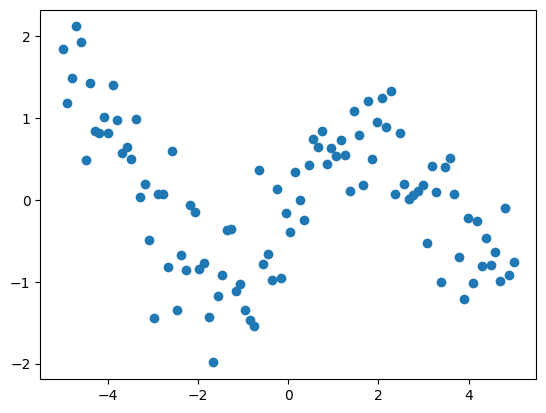

In [26]:
# --- 3. GBDT for Regression 🌳 ---
print_header("3. How GBDT Solves Regression")

# GBDT works by sequentially adding predictors to an ensemble, each one correcting its predecessor.
# We will manually demonstrate the first two steps.

# Create some non-linear data
np.random.seed(0)
X_gbdt = np.linspace(-5, 5, 100).reshape(-1, 1)
y_gbdt = np.sin(X_gbdt).ravel() + np.random.normal(0, 0.5, 100)

# Step 1: Train the first simple tree
tree_1 = DecisionTreeRegressor(max_depth=3)
tree_1.fit(X_gbdt, y_gbdt)
y1_pred = tree_1.predict(X_gbdt)

# Step 2: Calculate the errors (residuals) of the first tree
residuals = y_gbdt - y1_pred

# Step 3: Train a second tree on these residuals
tree_2 = DecisionTreeRegressor(max_depth=3)
tree_2.fit(X_gbdt, residuals)
y2_pred = tree_2.predict(X_gbdt)

# Final prediction is the sum of the predictions from all trees
y_final_pred = y1_pred + y2_pred

# Let's compare the R^2 score
r2_tree1 = r2_score(y_gbdt, y1_pred)
r2_final = r2_score(y_gbdt, y_final_pred)

print(f"R-squared of the first tree alone: {r2_tree1:.4f}")
print(f"R-squared after adding the second tree (trained on errors): {r2_final:.4f}")
print("\nAs you can see, the model improves by having the second tree correct the first tree's errors.")

In [15]:
# --- 4. R-squared vs. Adjusted R-squared 📊 ---
print_header("4. R-squared vs. Adjusted R-squared")


# R-squared will always increase or stay the same when you add a feature,
# even a useless one. Adjusted R-squared penalizes for useless features.

def adjusted_r2_score(r2, n, p):
    """Calculates adjusted R-squared."""
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


# Generate data with one useful feature and one useless (random) feature
np.random.seed(42)
n_samples = 100
# A useful feature
x1_useful = np.random.rand(n_samples, 1) * 10
# A useless, random feature
x2_useless = np.random.randn(n_samples, 1)
# Target variable depends only on the useful feature
y_r2 = 2 * x1_useful.flatten() + 5 + np.random.normal(0, 2, n_samples)

# Model 1: Using only the useful feature
p1 = 1  # number of predictors
model1 = LinearRegression().fit(x1_useful, y_r2)
y1_pred_r2 = model1.predict(x1_useful)
r2_model1 = r2_score(y_r2, y1_pred_r2)
adj_r2_model1 = adjusted_r2_score(r2_model1, n_samples, p1)

print(f"Model 1 (with 1 useful feature):")
print(f"  - R-squared: {r2_model1:.4f}")
print(f"  - Adjusted R-squared: {adj_r2_model1:.4f}")

# Model 2: Adding the useless feature
X_combined = np.hstack([x1_useful, x2_useless])
p2 = 2  # number of predictors
model2 = LinearRegression().fit(X_combined, y_r2)
y2_pred_r2 = model2.predict(X_combined)
r2_model2 = r2_score(y_r2, y2_pred_r2)
adj_r2_model2 = adjusted_r2_score(r2_model2, n_samples, p2)

print(f"\nModel 2 (with 1 useful + 1 useless feature):")
print(f"  - R-squared: {r2_model2:.4f}")
print(f"  - Adjusted R-squared: {adj_r2_model2:.4f}")

print("\nKey observation:")
print("  - R-squared slightly INCREASED after adding a random feature.")
print("  - Adjusted R-squared DECREASED, correctly penalizing the model for the useless feature!")



4. R-squared vs. Adjusted R-squared
Model 1 (with 1 useful feature):
  - R-squared: 0.8804
  - Adjusted R-squared: 0.8792

Model 2 (with 1 useful + 1 useless feature):
  - R-squared: 0.8805
  - Adjusted R-squared: 0.8780

Key observation:
  - R-squared slightly INCREASED after adding a random feature.
  - Adjusted R-squared DECREASED, correctly penalizing the model for the useless feature!


## 课程内容：分类问题是一类用于预测类别标签的机器学习问题。真实世界中，Amazon的推荐系统、Google的搜索引擎、排序等领域包含着大量地分类问题。本节讲介绍一系列经典的分类模型，包括logistics regression，SVM，决策树，随机森林，KNN等
1.什么是support vectors？

2.如何通过样本量大小来选择分类器？

3.Naïve Bayes的两种优化方法，MAP和MLE的区别？

4.Linear SVM和Non-linear SVM的区别是什么？

5.Kernel function是什么？什么时候使用kernel function？

6.Log loss 和hinge loss的区别？

7.KNN是监督学习方法还是无监督学习方法

8.Naïve Bayes的参数是什么？为什么是Naïve的？

### 1. 什么是support vectors?

简单来说，**支撑向量 (Support Vectors)** 是在训练支持向量机 (SVM) 模型时，**离决策边界最近的那些训练样本点**。

它们是整个模型中最关键的数据点，因为它们**唯一地定义（或“支撑”着）决策边界的位置和方向**。

---

### 一、一个直观的比喻：划分领土

想象一下，你要在地图上划一条线，来区分两个敌对的部落（比如红点部落和蓝点部落）。

为了确保未来冲突最少，你不想仅仅划一条线把它们分开，而是希望在这两个部落之间留出一条尽可能宽的“**缓冲区**”或“**街道**”。

* **决策边界 (Decision Boundary)**：就是你画在街道正中间的那条线。
* **间隔 (Margin)**：就是整条街道的宽度。SVM的目标就是让这条街道**最宽**。
* **支撑向量 (Support Vectors)**：就是那些**位于街道边缘、离街道中心线最近的房子（数据点）**。

在这个比喻中，你会发现一个关键事实：

> **只有这些“街边”的房子（支撑向量）决定了街道的位置和宽度。** 那些远离街道的房子（非支撑向量），无论你怎么移动它们（只要不跨过街道），都不会影响街道的划分。

---

### 二、为什么支撑向量如此重要？

1.  **它们定义了模型**：整个SVM模型（也就是那条最优的决策边界）完全是由支撑向量决定的。如果移动一个支撑向量，决策边界就会跟着改变。但如果你移动一个非支撑向量，决策边界将保持不变。

2.  **高效性**：因为模型只依赖于一小部分的训练数据（即支撑向量），所以SVM在预测时非常高效，并且占用内存较少。模型只需要记住这些关键点，而不需要记住整个数据集。

3.  **鲁棒性**：模型对那些非支撑向量不敏感。这使得SVM在一定程度上能够抵抗异常值（outliers），前提是这些异常值没有近到成为支撑向量。

---

### 三、支撑向量的分类

支撑向量本身还可以细分为两类：

1.  **硬间隔 (Hard Margin) SVM**：
    * 在数据是**线性可分**的情况下使用。
    * 所有的支撑向量都**精确地**位于间隔的边缘（虚线上）。

2.  **软间隔 (Soft Margin) SVM**：
    * 在数据**不是完全线性可分**（有噪声或重叠）的现实情况下使用。
    * 这时，我们会允许一些点“不守规矩”。
    * 支撑向量可以是：
        * **在间隔边缘上** (On the margin)。
        * **在间隔内部** (Inside the margin)。
        * **在错误的一侧** (On the wrong side of the decision boundary)。


即使在软间隔的情况下，这些“不守规矩”的点（连同在边缘上的点）依然是支撑向量，因为它们共同影响着决策边界的位置，模型在优化时必须重点关注它们。

### 总结

| 特性 | 描述 |
| :--- | :--- |
| **定义** | 离决策边界最近的训练样本点。 |
| **角色** | 它们是模型中**唯一**有用的点，共同“支撑”起最优的决策边界。 |
| **影响** | 只有移动支撑向量才会改变模型；移动其他点则不会。 |
| **优点** | 使得SVM模型高效、内存占用少。 |

简而言之，支撑向量就是SVM模型在训练数据中找到的**“最难区分”**、**“最具代表性”** 的边界点。

### 2. 如何通过样本量大小来选择分类器？
这是一个非常实用且重要的问题。通过样本量大小来选择分类器，本质上是在**模型的复杂性（方差）**和**过拟合的风险**之间做权衡。没有一个绝对的公式，但有一些非常可靠的指导原则和经验法则。

下面，我将样本量分为小、中、大三个范围，并讨论每个范围内的主要考量和推荐的分类器。

---

### 一、 小型样本量 (Small Sample Size)

* **定义**: 通常指几千个样本以下（例如 N < 10,000），特别是当特征数量（P）相对于样本量较大时（P > N）。
* **主要担忧**: **过拟合 (Overfitting)**。模型会轻易地记住训练数据中的噪声，而不是学习到底层规律，导致其泛化能力极差。
* **指导原则**: 选择**低方差、高偏差**的模型。简单、对参数不敏感、自带强假设（强正则化效果）的模型是首选。

#### 推荐的分类器：

1.  **朴素贝叶斯 (Naive Bayes)**
    * **为什么？** 它有一个“朴素”的核心假设——所有特征相互独立。这个强大的假设就像一个内置的正则化器，极大地降低了模型的复杂度，使其很难过拟合。尤其在文本分类等特征维度很高的场景下，用少量数据也能获得不错的效果。
    * **适用场景**: 文本分类、垃圾邮件过滤。

2.  **逻辑回归 (Logistic Regression) & 线性支持向量机 (Linear SVM)**
    * **为什么？** 它们都是线性模型，模型复杂度低。通过 L1 或 L2 正则化，可以进一步惩罚复杂的权重，强制模型保持简单。它们的目标是找到一个简单的线性边界，这在数据量少时是更安全的选择。
    * **适用场景**: 当你相信数据大致是线性可分的，或者作为任何分类问题的强大基线模型。

3.  **K-近邻算法 (k-NN)**
    * **为什么？** 这是一个非参数模型，其复杂度由 K 值控制。在数据量小时，如果特征维度不高且特征的尺度统一，它可以有效地基于“邻居”投票做出判断。但它对噪声和无关特征非常敏感。

#### 应避免的分类器：

* **深度神经网络 (Deep Neural Networks)**：参数太多，数据量完全不足以支撑其训练，几乎一定会过拟合。
* **复杂的决策树或梯度提升树 (GBDT)**：如果不进行严格的剪枝和参数限制（如限制树的深度），它们会轻易地为每个样本点生成一个路径，从而完美地记住训练集。

---

### 二、 中型样本量 (Medium Sample Size)

* **定义**: 大约在1万到10万个样本之间。
* **主要担忧**: **平衡偏差和方差**。数据量足够支持更复杂的模型，但仍需警惕过拟合。模型调参变得至关重要。
* **指导原则**: 可以开始使用那些能捕捉非线性关系、复杂度更高的模型。

#### 推荐的分类器：

1.  **梯度提升决策树 (GBDT, 如 XGBoost, LightGBM)**
    * **为什么？** 这是目前处理中型表格数据的**王者**。它通过集成许多弱学习器（决策树）来构建一个强大的模型，能够捕捉复杂的非线性关系和特征交互。通过调整学习率、树的深度、正则化项等参数，可以很好地控制模型的复杂度。
    * **适用场景**: 几乎所有的结构化（表格）数据分类任务。

2.  **随机森林 (Random Forest)**
    * **为什么？** 它也是一种强大的集成模型，通过构建多棵独立的决策树并进行投票来减少方差。它通常比 GBDT 更不容易过拟合，且超参数更少，更容易调整。
    * **适用场景**: 与 GBDT 类似，是一个非常稳健和强大的选择。

3.  **支持向量机 (SVM with Kernels, 如 RBF 核)**
    * **为什么？** 通过核技巧（Kernel Trick），SVM 可以在高维空间中找到非线性决策边界。它对于特征维度很高的数据集依然表现出色。
    * **适用场景**: 图像识别（在深度学习之前）、生物信息学等特征维度高的领域。

---

### 三、 大型样本量 (Large Sample Size)

* **定义**: 几十万、几百万甚至更多样本。
* **主要担忧**: **计算成本、训练时间和可扩展性**。过拟合风险降低，计算瓶颈成为主要问题。
* **指导原则**: 选择能够利用海量数据、复杂度高（低偏差）且计算效率高的模型。

#### 推荐的分类器：

1.  **深度神经网络 (Deep Neural Networks, DNNs)**
    * **为什么？** 神经网络的巨大优势在于其**可扩展性**。只要数据量足够大，你就可以通过增加层数和神经元数量来构建一个极其复杂的模型，以逼近任何复杂的函数。它们是处理非结构化数据（图像、声音、文本）的绝对王者。
    * **适用场景**: 图像识别、自然语言处理、语音识别等。对于非常大的表格数据，DNNs 也可能超越 GBDT。

2.  **梯度提升决策树 (GBDT, 特别是 LightGBM)**
    * **为什么？** 像 LightGBM 这样的现代 GBDT 框架在设计时就考虑了大规模数据集。它们使用直方图算法等技术来加速训练，并且在内存使用上进行了优化，使其在处理数百万行数据时依然高效且精准。
    * **适用场景**: 任何大规模的结构化（表格）数据任务。

3.  **逻辑回归等线性模型**
    * **为什么？** 不要忘记简单模型！当数据量巨大且特征维度极高（例如广告点击率预估中的数百万个稀疏特征）时，线性模型训练速度极快，可解释性强，并且可以作为一个非常难以被击败的基线。

#### 应谨慎使用的分类器：

* **带核的支持向量机 (Kernel SVM)**：其训练复杂度大约在 O(N²) 到 O(N³) 之间，当样本量 N 变得非常大时，训练时间会变得无法接受。
* **K-近邻算法 (k-NN)**：预测时需要计算与所有训练样本的距离，在数据量大时，预测会变得极其缓慢。

### 总结表格

| 样本量 | 主要担忧 | 指导原则 | 推荐分类器 |
| :--- | :--- | :--- | :--- |
| **小型** | **过拟合** | 简单、高偏差、低方差 | 朴素贝叶斯、逻辑回归、线性SVM |
| **中型** | **平衡偏差与方差** | 更复杂、需仔细调参 | GBDT (XGBoost/LightGBM)、随机森林、核SVM |
| **大型** | **计算成本与时间** | 复杂、低偏差、可扩展 | 深度神经网络、GBDT (LightGBM)、（作为基线的）线性模型 |

### 最后的建议：实践胜于理论

这些都是基于经验的指导原则。在实际工作中，最好的方法是：
1.  **从简单的开始**：始终先用逻辑回归等简单模型作为你的基线（Baseline）。
2.  **尝试更复杂的模型**：根据你的数据量，选择2-3个更高级的模型（如 LightGBM、随机森林）进行试验。
3.  **交叉验证和评估**：使用严格的交叉验证来评估和比较不同模型的性能，选择最适合你具体问题的那个。

### 3.Naïve Bayes的两种优化方法，MAP和MLE的区别？
好的，这是一个非常核心的统计学习问题。MLE 和 MAP 是在为朴素贝叶斯（以及许多其他概率模型）估计参数时的两种不同哲学和方法。

简单来说，**MLE 完全相信数据，而 MAP 在相信数据的同时，还带有一点“先入为主”的个人经验（先验知识）**。

---

### 一个直观的比喻：硬币实验

假设一个朋友给你一枚硬币，让你估计它正面朝上（H）的概率 $P(H)$。

* **你是一个 MLE 信仰者**：
    * 你抛了 5 次，结果是：**H, H, H, T, T**。
    * 你只相信你看到的数据。根据数据，正面出现了 3 次，总共 5 次。
    * 你的估计是 $P(H)_{MLE} = \frac{3}{5} = 0.6$。
    * 如果结果是 **H, H, H, H, H**，你的估计就是 $P(H)_{MLE} = \frac{5}{5} = 1.0$。你会得出结论：这枚硬币 100% 只会出正面。

* **你是一个 MAP 信仰者**：
    * 你同样抛了 5 次，结果是：**H, H, H, T, T**。
    * 在实验前，你有一个**先验信念 (Prior Belief)**：”根据我的生活经验，大部分硬币都是基本均匀的，所以 $P(H)$ 应该接近 0.5“。
    * 现在你看到了数据（H, H, H, T, T），这个数据告诉你的信息（**似然/Likelihood**）是 $P(H)$ 可能是 0.6。
    * MAP 的做法是**结合你的先验信念和数据给你的信息**，找到一个最可能的概率。你不会直接跳到 0.6，而是会把你的估计从 0.5 向 0.6 的方向稍微修正一点，可能得到 $P(H)_{MAP} \approx 0.55$。
    * 如果结果是 **H, H, H, H, H**，你也不会认为硬币 100% 是正面。你会想：“这太巧了，虽然数据如此，但我过去的经验告诉我硬币很少会这样。我承认它可能偏向正面，但我猜 $P(H)_{MAP}$ 可能是 0.8 或 0.9，而不是 1.0”。

---

### MLE vs. MAP 的详细区别

在朴素贝叶斯中，我们需要估计两组参数：
1.  **类别的先验概率** $P(C_k)$
2.  **给定类别下特征的条件概率** $P(x_i|C_k)$

MLE 和 MAP 的区别就体现在如何估计这些概率上。

#### 1. MLE (Maximum Likelihood Estimation) - 最大似然估计

* **目标**: 找到一组参数 $\theta$，使得我们观测到的这批数据出现的可能性（似然）最大。
    $$
    \theta_{MLE} = \arg\max_{\theta} P(\text{Data}|\theta)
    $$
* **如何计算**: 在朴素贝叶斯中，这非常简单，就是**频率计数**。
    * $P(C_k) = \frac{\text{类别 } C_k \text{ 的样本数}}{\text{总样本数}}$
    * $P(x_i|C_k) = \frac{\text{类别 } C_k \text{ 中特征 } x_i \text{ 出现的次数}}{\text{类别 } C_k \text{ 的总特征数}}$
* **优点**:
    * 简单直观，计算速度快。
    * 当**数据量非常大**时，MLE 的估计通常非常准确，因为它无限接近于真实的概率分布。
* **致命缺点**: **零概率问题 (Zero-Frequency Problem)**。
    * 如果在训练集中，某个特征（例如单词“独角兽”）从未在某个类别（例如“体育新闻”）中出现过，那么 $P(\text{“独角兽”}|\text{“体育”}) = 0$。
    * 在预测时，如果一篇待测的体育新闻里恰好包含了“独角兽”这个词，根据朴素贝叶斯的连乘公式，整个文章属于“体育”的概率会因为这一个 0 而变为 0，这是非常不合理的。

#### 2. MAP (Maximum A Posteriori Estimation) - 最大后验估计

* **目标**: 找到一组参数 $\theta$，使得在观测到这批数据后，这组参数本身为真的可能性（后验概率）最大。
    $$
    \theta_{MAP} = \arg\max_{\theta} P(\theta|\text{Data}) \propto \underbrace{P(\text{Data}|\theta)}_{\text{Likelihood}} \cdot \underbrace{P(\theta)}_{\text{Prior}}
    $$
    可以看到，MAP = **似然 (Likelihood)** $\times$ **先验 (Prior)**。它在 MLE 的基础上，增加了一个**先验项 $P(\theta)$**，也就是我们对参数的初始信念。

* **如何计算**: 在朴素贝叶斯中，MAP 通常通过一种叫做**拉普拉斯平滑 (Laplace Smoothing)** 或**加法平滑 (Additive Smoothing)** 的技术来实现。这相当于我们假设“每个特征在每个类别中都至少出现过 $\alpha$ 次”的先验信念。
    * $P(C_k) = \frac{\text{类别 } C_k \text{ 的样本数} + \alpha}{\text{总样本数} + \alpha \cdot K}$ (K是类别总数)
    * $P(x_i|C_k) = \frac{\text{类别 } C_k \text{ 中特征 } x_i \text{ 出现的次数} + \alpha}{\text{类别 } C_k \text{ 的总特征数} + \alpha \cdot V}$ (V是词汇表总大小)
    * 最常用的情况是 $\alpha=1$，即假设每个特征都预先出现过1次。

* **优点**:
    * **完美解决了零概率问题**。通过平滑，即使某个特征从未在训练集中出现，它仍然会得到一个很小但非零的概率。
    * 在**数据量较小**时，引入先验可以有效防止模型过拟合，使模型更加稳健。这相当于一种**正则化**。
* **缺点**:
    * 需要选择一个先验（比如选择 $\alpha$ 的值），这个选择本身可能会引入偏差。
    * 当数据量非常大时，先验的影响会逐渐减弱，MAP 的估计会趋近于 MLE 的估计。

---

### 总结表格

| 特性 | MLE (最大似然估计) | MAP (最大后验估计) |
| :--- | :--- | :--- |
| **核心思想** | 完全相信数据，让数据出现的可能性最大 | 结合数据和先验信念，让参数本身为真的可能性最大 |
| **数学公式** | $\arg\max P(\text{Data}|\theta)$ | $\arg\max P(\text{Data}|\theta) \cdot P(\theta)$ |
| **在朴素贝叶斯中的实现** | 简单的频率计数 | **拉普拉斯平滑** / 加法平滑 |
| **对零概率问题** | **无法处理**，会导致概率连乘为0 | **完美解决**，保证概率非零 |
| **与数据量的关系** | 在**大数据**集上表现良好 | 在**小数据**集上更稳健，能有效防止过拟合 |
| **本质** | 频率学派思想 | 贝叶斯学派思想 |

**一句话总结：**
当你拥有海量数据时，MLE 简单有效；当你的数据量有限或稀疏时，MAP (通过拉普拉斯平滑) 是一个更安全、更稳健的选择。在实践中，几乎所有的朴素贝叶斯分类器都会默认使用某种平滑技术，也就是默认使用了 MAP 的思想。

### 4.Linear SVM和Non-linear SVM的区别是什么？
好的，这是一个关于支持向量机（SVM）的核心问题。它们的根本区别在于**处理数据分布的能力**和**实现这一能力所使用的技术**。

简单来说：
* **线性SVM (Linear SVM)** 只能画出一条**直线（或平面）**来分割数据。
* **非线性SVM (Non-linear SVM)** 能画出一条**曲线（或曲面）**来分割数据。

下面我们来深入探讨这个区别。

---

### 线性SVM (Linear SVM)

#### 1. 目标
当你的数据点**线性可分**时（Linearly Separable），也就是可以被一条直线完美分开时，使用线性SVM。

#### 2. 工作原理
线性SVM的目标不仅仅是找到一条能分开数据的直线，而是要找到那条**最优**的直线。这个“最优”的标准是**最大化间隔（Maximum Margin）**。

* **决策边界 (Decision Boundary)**: 这是用来分类的中心线。
* **间隔 (Margin)**: 这是决策边界与两边最近的数据点（即**支撑向量**）之间的距离。SVM的目标就是让这个间隔尽可能宽。一条更宽的“街道”意味着模型对新数据的容错能力更强，泛化能力更好。
* **决策函数**: 它的形式很简单，就是一条直线方程：$f(x) = w^T x + b$。

![Linear SVM](https://i.imgur.com/2A2C46C.png)

#### 3. 优点和局限
* **优点**:
    * **速度快**: 训练和预测的速度都很快，因为它只涉及简单的线性运算。
    * **参数少**: 主要只需要调整正则化参数 `C`。
    * **可解释性强**: 权重向量 `w` 可以帮助我们理解哪些特征更重要。
* **局限**:
    * 它无法处理**线性不可分**的数据。如果数据的分布是环形、波浪形或其他复杂形状，线性SVM将无能为力。

---

### 非线性SVM (Non-linear SVM)

#### 1. 目标
当你的数据**线性不可分**时，就需要使用非线性SVM。

![Non-linear Data](https://i.imgur.com/vHqA9U2.png)
*(上图中的数据，无法用一条直线分开)*

#### 2. 工作原理：核技巧 (The Kernel Trick)
非线性SVM的实现方式非常巧妙，它并不是直接去画一条曲线，而是通过一个叫做**“核技巧” (Kernel Trick)** 的数学魔法。

* **核心思想**: 如果数据在当前维度（比如二维）是线性不可分的，那么就把它**映射到一个更高维度的空间**，让它在这个新空间里变得线性可分。

* **一个简单的比喻**: 想象一下你在一张纸上画了一些红点和蓝点，红点圈住了蓝点。在二维的纸面上，你画不出一条直线分开它们。但如果你把这张纸向上弯曲成一个碗状，蓝点在碗底，红点在碗口。现在，从三维的视角看，你就可以用一个水平的平面轻易地把它们分开了！

* **核函数 (Kernel Function)**: 这个函数的作用就是实现上述的“升维打击”，但它更聪明。它能够在**不进行实际的、复杂的坐标变换**的情况下，直接计算出数据点在那个高维空间中的关系（点积）。这极大地节省了计算成本。

* **决策函数**: 它的形式变得更复杂，依赖于支撑向量和核函数：$f(x) = \sum \alpha_i y_i K(x_i, x) + b$。这里的 $K(x_i, x)$ 就是核函数。

最常用的核函数是 **RBF核 (Radial Basis Function Kernel)**，它能够创建出非常灵活、复杂的曲线边界，因为它衡量的是数据点之间的“距离相似性”。

#### 3. 优点和局限
* **优点**:
    * **非常强大**: 能够处理极其复杂的数据分布和非线性关系。
    * **通用性强**: 通过选择不同的核函数和参数，可以适应各种数据。
* **局限**:
    * **计算成本高**: 训练时间比线性SVM长得多，尤其是在数据集很大时。
    * **参数选择困难**: 你不仅要调整正则化参数 `C`，还要调整核函数的参数（比如RBF核的 `gamma`），调参变得更加复杂。
    * **“黑盒”模型**: 可解释性变差，很难直观地理解模型是如何做出决策的。

---

### 总结表格

| 特性 | 线性SVM (Linear SVM) | 非线性SVM (Non-linear SVM) |
| :--- | :--- | :--- |
| **适用数据** | 线性可分或近似线性可分 | 复杂的、线性不可分的数据 |
| **决策边界** | 直线、平面、超平面 | 曲线、曲面、复杂的形状 |
| **核心机制** | **最大化间隔** | **核技巧 (Kernel Trick)** + 最大化间隔 |
| **训练速度** | **快** | **慢** (尤其在大数据集上) |
| **主要超参数** | 正则化参数 `C` | `C` 以及核函数自身的参数 (如 `gamma`) |
| **可解释性** | 较好 | 较差 |

### 实践建议

1.  **始终从线性SVM开始**：它是一个非常强大的基线模型。如果你的数据集特征维度很高（比如文本分类），数据很可能在高维空间中是线性可分的，线性SVM通常就足够了，而且速度快得多。
2.  **当线性SVM效果不佳时，再尝试非线性SVM**：如果线性模型的性能无法满足你的要求，这通常意味着数据存在复杂的非线性结构。这时，可以换用带有 **RBF 核**的非线性SVM，它通常能带来显著的性能提升。

### 5. Kernel function是什么？什么时候使用kernel function？
好的，这是一个非常核心且强大的机器学习概念。我们来深入地探讨一下。

简单来说，**核函数 (Kernel Function)** 是一种数学捷径，它让线性分类算法（如SVM）能够**高效地处理非线性问题**。

---

### Kernel Function 是什么？

#### 1. 问题背景：线性不可分
想象一下，一个标准的线性分类器（比如线性SVM）的目标是画一条**直线**（或高维度的平面）来分割数据。但如果你的数据是这样的：

![线性不可分的数据](https://i.imgur.com/vHqA9U2.png)
*(左图：在二维平面上，你画不出任何一条直线能完美地分开红点和蓝点)*

这就是**线性不可分**问题。

#### 2. 聪明的思想：升维打击
解决这个问题的一个天才想法是：如果数据在当前维度是乱七八糟的，那我们就把它**映射到一个更高的维度空间**，在这个新空间里，数据可能就变得可以用一条直线（平面）分开了。

这就好比你在一张平坦的纸上有一些混杂的点，你无法一刀切开。但如果你把这张纸向上弯曲，从三维视角看，你可能就可以用一个水平的“刀”（平面）轻易地把它们分开了。

#### 3. “核技巧”的魔力
“升维”这个思想很好，但有一个致命问题：如果映射到的维度非常非常高（比如几百万维，甚至是无限维），那么计算每个数据点在新空间里的坐标，然后再进行分类，这个计算量将是灾难性的，甚至是不可能的。

这时，**核函数**就登场了。它是一个堪称“魔法”的技巧，被称为**核技巧 (The Kernel Trick)**。

SVM算法的数学原理告诉我们，在整个分类过程中，我们其实并**不需要知道每个点在高维空间中的确切坐标**。我们唯一需要知道的，是**任意两个点在那个高维空间中的“关系”**，这个关系可以用**点积 (dot product)** 来衡量。

**核函数的定义：**
> 核函数 $K(x_i, x_j)$ 是一个函数，它接收两个在**原始低维空间**中的点作为输入，但它的计算结果**等价于**将这两个点映射到高维空间后，再计算它们的点积。
> $$K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$$
> 其中 $\phi(x)$ 是将点 $x$ 映射到高维空间的函数。

**核函数的本质**：它是一个**计算快捷方式**。它让我们享受到了在高维空间中进行线性划分的好处，却完全避免了进入那个高维空间的巨大计算代价。

---

### 什么时候使用 Kernel Function？

你可以在以下情况考虑使用核函数（通常是在SVM等算法中）：

#### 1. 当数据不是线性可分的时候
这是使用核函数最根本、最主要的原因。

* **如何判断？**
    1.  **数据可视化**：如果你的特征只有2个或3个，可以通过绘制散点图直观地观察数据是否能被一条直线分开。
    2.  **基线模型性能差**：更实际的方法是，**先尝试一个快速的线性模型**（比如 `LinearSVC` 或 `LogisticRegression`）。如果它的性能（如准确率、F1分数）很差，这强烈暗示数据之间可能存在复杂的非线性关系。

#### 2. 当你想捕捉特征之间的复杂关系时
线性模型只能捕捉特征的线性组合。但现实世界中，特征之间的关系可能是多项式的、指数的、周期性的等等。核函数，特别是 **RBF 核（高斯核）**，非常擅长捕捉这种复杂的局部性关系。

#### 实践中的决策流程：

1.  **第一步：永远先尝试线性模型**
    * 使用 `LinearSVC`（或者 `SVC(kernel='linear')`）。
    * **为什么？** 它速度极快，可解释性强，并且是一个非常强大的基线。如果你的特征数量非常多（例如上万维的文本数据），数据很可能在高维空间中本身就是线性可分的，线性核往往是最好且最快的选择。

2.  **第二步：评估线性模型的表现**
    * 如果线性模型的表现已经足够好，满足了你的业务需求，那么**恭喜你，你不需要使用更复杂的核函数了！**

3.  **第三步：如果线性模型表现不佳，再尝试非线性核**
    * 这表明数据中可能存在线性模型无法捕捉的复杂模式。
    * **首选推荐：RBF 核 (高斯核)**
        * 在 `scikit-learn` 中是 `SVC(kernel='rbf')`。
        * **为什么？** RBF核是一个非常强大且通用的“瑞士军刀”。它能处理各种复杂的形状，而且只有一个关键参数 `gamma` 需要调整（连同正则化参数 `C`）。通过交叉验证（如 `GridSearchCV`）来寻找最优的 `C` 和 `gamma` 组合，通常能获得非常好的结果。
    * **其他选择：**
        * **多项式核 (Polynomial Kernel)**: `kernel='poly'`。当你怀疑特征之间存在多项式关系时可以使用。需要调整的参数更多（如 `degree`）。
        * **Sigmoid 核**: `kernel='sigmoid'`。在特定场景下使用，表现类似于神经网络。

### 总结表格

| 场景 | 是否使用核函数 | 推荐的核 (Kernel) | 理由 |
| :--- | :--- | :--- | :--- |
| **数据量很大，特征维度很高** | 否（或使用线性核） | **Linear** | 速度快，效果通常已经很好，避免高计算成本。 |
| **数据特征少，样本量不大** | 是 | **RBF (高斯核)** | 默认首选，非常灵活，能处理复杂的非线性关系。 |
| **线性模型表现很差** | 是 | **RBF (高斯核)** | 线性模型无法捕捉数据模式，需要更强大的非线性模型。 |
| **你知道特征间存在多项式关系** | 是 | **Polynomial (多项式核)** | 模型假设与数据特性匹配。 |
| **不确定数据分布** | **先试Linear，再试RBF** | **Linear**, **RBF** | 这是最稳健、最标准的实践流程。 |

### 6.Log loss 和hinge loss的区别？
好的，这是一个非常核心的机器学习问题，因为它揭示了两种最著名的分类模型——**逻辑回归 (Logistic Regression)** 和**支持向量机 (SVM)**——在“思考”方式上的根本不同。

简单来说，它们最大的区别在于对“惩罚错误”的哲学不同：
* **Log Loss (对数损失)**：一个追求“概率精确”的完美主义者。即使你做出了正确的预测，但只要你不够自信（概率不是100%），它依然会给你一点小小的惩-罚。
* **Hinge Loss (合页损失)**：一个讲求“足够好就行”的实用主义者。只要你的预测不仅正确，而且离决策边界有足够的安全距离，它就认为你已经完美了，不会给你任何惩罚。

---

### 一个直观的比喻：考试评分

想象一下，你在参加一个只有“是/否”答案的考试。
* **Log Loss 老师**：这位老师不仅要求你答对，还要求你写下你对这道题的**自信度（0%到100%）**。
    * 你答对了，但自信度只有70%，老师会扣一点分，因为你不够“自信”。
    * 你答对了，自信度是99%，老师几乎不扣分。
    * 你答错了，但自信度只有51%，老师会扣分，但不会太狠。
    * **你答错了，但自信度是99%**，老师会**极其严厉**地惩罚你，扣掉巨量的分数，因为你“错得理直气壮”。
* **Hinge Loss 老师**：这位老师只看你的最终答案，并且有一个“安全线”。
    * 你答对了，并且你的“逻辑清晰度”（可以理解为得分）超过了某个安全线，老师给你满分，完全不扣分。
    * 你答对了，但你的“逻辑清晰度”没到安全线，老师会稍微扣一点分。
    * 你答错了，老师会根据你错的离谱程度线性地扣分。

---

### Log Loss (对数损失) / 交叉熵损失

* **关联模型**：**逻辑回归 (Logistic Regression)**
* **核心思想**：这是一个**概率性**的损失函数。它衡量的是模型输出的概率分布与真实的标签分布之间的差异。
* **数学公式**：对于一个样本，`y`是真实标签 (0或1)，`p`是模型预测该样本为1的概率。
    $$
    \text{LogLoss} = -(y \log(p) + (1-y) \log(1-p))
    $$
* **行为特点**：
    1.  **输出是概率**：它要求模型的输出必须是0到1之间的概率值。
    2.  **对惩罚敏感**：
        * 即使对于正确的预测，损失也永远不会为0（除非概率p不多不少正好是1）。例如，如果真实标签是1，你预测的概率是0.9，仍然会有 `-log(0.9) ≈ 0.1` 的小损失。
        * 对于**错误的、且非常自信**的预测，损失会趋近于**无穷大**。如果真实标签是1，你却预测概率为0.0001，损失 `-log(0.0001)` 会是一个非常大的数字。这使得模型在训练时会极力避免这种“极端错误”。
    3.  **曲线平滑**：损失函数是平滑且连续可微的，这使得使用梯度下降等优化算法非常方便。

### Hinge Loss (合页损失)

* **关联模型**：**支持向量机 (SVM)**
* **核心思想**：这是一个**最大间隔 (maximum-margin)** 型的损失函数。它的目标不是拟合概率，而是确保正确分类的样本点离决策边界有至少为1的“安全间隔”。
* **数学公式**：对于一个样本，`t`是真实标签（-1或+1），`y`是模型的原始输出（`w^T x + b`，**注意：这不是概率**）。
    $$
    \text{HingeLoss} = \max(0, 1 - t \cdot y)
    $$
* **行为特点**：
    1.  **输出是原始分**：它直接作用于模型的原始输出得分`y`，这个得分的正负号代表类别，绝对值代表离边界的远近。
    2.  **对惩罚不敏感（在安全区内）**：
        * 如果一个样本被正确分类，并且离边界足够远（即 $t \cdot y \ge 1$），那么 $1 - t \cdot y$ 就是负数，$\max(0, \dots)$ 的结果就是**0**。这意味着模型认为这个预测已经“足够好”，**完全没有损失**。
        * 只有当样本点进入“间隔区”或被错误分类时（$t \cdot y < 1$），才会产生一个线性的惩罚。
    3.  **不关心概率**：Hinge Loss不产生概率。它的目标是找到一个最优的决策边界，而不是为每个样本估计其属于某个类别的概率。

---

### 图形化对比

如果我们假设正确类别是+1，横轴是模型原始输出 `y`，纵轴是损失：
![Loss Functions](https://i.imgur.com/vHqA9U2.png)

* **Log Loss (蓝线)**：是一条平滑的曲线。即使 `y` 很大（非常确信是正确类别），损失也只是无限接近于0，但永远不会等于0。当 `y` 是负数时，损失会急剧上升。
* **Hinge Loss (绿线)**：像一个“合页”（hinge）。当 `y >= 1` 时，损失**恒等于0**。当 `y < 1` 时，损失呈线性增加。

### 总结表格

| 特性 | Log Loss (对数损失) | Hinge Loss (合页损失) |
| :--- | :--- | :--- |
| **主要模型** | **逻辑回归** | **支持向量机 (SVM)** |
| **核心哲学** | 拟合精确的**概率** | 找到**最大化间隔**的边界 |
| **模型输出** | 必须是0-1之间的概率 | 原始的决策分数 (raw score) |
| **对正确预测的惩罚** | **有** (除非概率为1)，鼓励更自信 | **无** (只要超过安全间隔) |
| **对错误预测的惩罚** | **指数级**增长，对自信的错误惩罚极重 | **线性**增长 |
| **函数形状** | 平滑、连续可微 | 分段线性、在 `t*y=1` 处不可微 |
| **主要用途** | 需要获得概率输出的场景 (如广告点击率预估) | 目标是最大化分类边界的场景 (如图像分类) |

### 7. KNN是监督学习方法还是无监督学习方法

KNN (K-近邻) 是一种 **监督学习 (Supervised Learning)** 方法。

这是一个非常明确的分类，尽管初学者有时会因其与聚类算法（如 K-Means）都依赖“距离”而感到困惑。

下面是详细的解释，说明为什么 KNN 是监督学习。

---

### 1. 监督学习的核心定义

监督学习算法的核心特征是它从**已标记 (labeled)** 的训练数据中学习。这意味着每一条训练数据都包含两个部分：
* **输入特征 (Input Features)**：描述该数据点的属性。
* **正确的输出标签 (Correct Output Label)**：我们希望模型预测的结果。

算法的目标是学习一个从输入特征到输出标签的映射关系，以便对新的、未见过的数据进行预测。

### 2. KNN 如何完全符合监督学习的定义

K-近邻算法的工作流程完美地体现了监督学习的模式：

1.  **训练/存储阶段**: KNN 接收一个**完全标记**的数据集。例如，在分类任务中，每个数据点都有其明确的类别归属（如“猫”、“狗”或“垃圾邮件”、“非垃圾邮件”）。KNN 会将这个带有标签的完整数据集存储在内存中。

2.  **预测阶段**: 当一个新的、未标记的数据点出现时，KNN 会执行以下步骤：
    a. 计算这个新点与**训练集中每一个已标记点**之间的距离。
    b. 找到距离最近的 `K` 个邻居。
    c. **查看这 K 个邻居的标签**。
    d. 通过“投票”（分类任务）或“求平均”（回归任务）的方式，根据这些已知标签来确定新数据点的预测标签。

关键点在于第 **(c)** 步：如果训练数据没有标签，KNN 将完全无法进行“投票”或“求平均”，也就无法做出任何有意义的预测。**对已知标签的依赖**是其作为监督学习方法的根本原因。

### 3. KNN 的两种监督学习任务

KNN 可以用于解决两种最主要的监督学习问题：

* **分类 (Classification)**:
    * **目标**: 预测一个离散的类别标签。
    * **方法**: 采用“少数服从多数”的投票原则。新数据点的类别被预测为其 `K` 个最近邻居中出现次数最多的那个类别。

* **回归 (Regression)**:
    * **目标**: 预测一个连续的数值。
    * **方法**: 计算 `K` 个最近邻居标签值的平均数（或加权平均数），并将该结果作为新数据点的预测值。

### 4. 为什么会与无监督学习混淆？

混淆通常来自于与 **K-Means 聚类算法** 的对比，K-Means 是一种典型的**无监督学习**方法。

| 特性 | KNN (K-近邻) - **监督学习** | K-Means (K-均值) - **无监督学习** |
| :--- | :--- | :--- |
| **学习目标** | 对新数据点**进行预测** (分类或回归)。 | 从数据中**发现隐藏的群组/结构**。 |
| **输入数据** | **必须是已标记的** `(特征, 标签)` 数据。 | **完全是未标记的**，只有特征数据。 |
| **输出结果** | 一个具体的预测值或类别标签。 | 将原始数据划分成的 `K` 个簇 (cluster)，并给出每个簇的中心点。 |

虽然两者都使用了“距离”和“K”这个参数，但它们的根本目的完全不同。KNN 利用标签来预测，而 K-Means 在没有标签的情况下创造“标签”（即簇的分配）。

### 结论

**KNN 毫无疑问是一种监督学习方法**，因为它完全依赖于一个带有已知输出标签的训练数据集来对新数据进行预测。

### 8. Naïve Bayes的参数是什么？为什么是Naïve的？
好的，这是一个关于朴素贝叶斯非常核心的问题。我们来详细拆解一下。

---

### Naïve Bayes的参数是什么？

朴素贝叶斯是一个概率模型，它的“参数”就是它在训练阶段从数据中学习到的所有概率值。这些参数是模型进行预测的基础。具体来说，模型需要学习两组主要的概率参数：

#### 1. 类别的先验概率 (Prior Probability): $P(C_k)$

这代表了在不考虑任何特征的情况下，某个类别 $C_k$ 本身出现的概率有多大。

* **如何计算**: 这就是简单的频率计数。
    $$
    P(C_k) = \frac{\text{属于类别 } C_k \text{ 的样本数量}}{\text{总样本数量}}
    $$
* **例子**: 在一个有100封邮件的数据集中，如果有30封是垃圾邮件，70封是正常邮件，那么：
    * $P(\text{垃圾邮件}) = 30 / 100 = 0.3$
    * $P(\text{正常邮件}) = 70 / 100 = 0.7$

#### 2. 给定类别下特征的条件概率 (Conditional Probability): $P(F_i | C_k)$

这代表了在已知邮件属于某个类别 $C_k$ 的前提下，特征 $F_i$ 出现的概率有多大。这是模型参数中最核心、数量最多的部分。

* **如何计算**: 这同样是频率计数，但范围被限制在特定的类别内。
    $$
    P(F_i | C_k) = \frac{\text{在类别 } C_k \text{ 的样本中，特征 } F_i \text{ 出现的次数}}{\text{在类别 } C_k \text{ 的样本中，所有特征出现的总次数}}
    $$
* **例子**: 在垃圾邮件分类中，特征就是单词。假设在所有30封垃圾邮件中，单词“购买”出现了15次，而所有垃圾邮件的总词数是1000个。那么：
    * $P(\text{“购买”} | \text{垃圾邮件}) = 15 / 1000 = 0.015$
    * 模型需要为词汇表中的**每一个单词**和**每一个类别**都计算出这样一个条件概率。如果你的词汇表有10000个单词，有2个类别，你就需要计算 20000 个这样的条件概率参数。

**总结一下**：朴素贝叶斯模型的“训练”过程，其实就是根据训练数据计算并存储这两组概率（先验概率和所有条件概率）的过程。它没有像神经网络那样的迭代“学习”过程，而是一次性的统计计算。

---

### 为什么是Naïve（朴素的）？

这个算法之所以被称为“Naïve”（朴素的，或天真的），是因为它建立在一个**非常强且在现实世界中几乎总是不成立**的假设之上。

这个核心假设就是：**特征之间条件独立 (Conditional Independence)**。

#### 1. 这个假设意味着什么？

它假设，在**已经知道类别（比如是垃圾邮件）**的前提下，一个特征（比如单词“中奖”）的出现与任何其他特征（比如单词“免费”）的出现是**完全独立、互不相关**的。

* **数学表达**:
    朴素贝叶斯假设：
    $$
    P(F_1, F_2, \dots, F_n | C_k) = P(F_1 | C_k) \times P(F_2 | C_k) \times \dots \times P(F_n | C_k)
    $$
    这个公式的转换之所以能成立，就是基于“特征之间条件独立”这个朴素假设。它极大地简化了计算。如果没有这个假设，我们需要计算的是左边的联合概率 $P(F_1, F_2, \dots, F_n | C_k)$，这将面临维度灾难，几乎不可能从有限的数据中准确估计。

#### 2. 为什么说这个假设很“天真”？

在现实世界中，特征之间几乎总是相关的。

* **直观例子（垃圾邮件分类）**:
    * **现实**: 在一封垃圾邮件中，单词“免费”、“紧急”、“点击”和“链接”同时出现的概率，远比它们各自独立出现的概率乘积要高。看到“免费”，我们几乎可以预料到后面可能会有“链接”。它们显然是**相关**的。
    * **朴素贝叶斯的看法**: 算法天真地认为，看到“免费”这个词，并不会增加或减少看到“链接”这个词的概率。它把每个单词都当作是独立扔进邮件里的。

* **直观例子（水果分类）**:
    * **现实**: 一个水果的特征“形状=圆形”和“颜色=红色”是相关的。
    * **朴素贝叶斯的看法**: 算法认为，知道了这个水果是“红色”的，并不会影响它“形状是圆形”的概率。

#### 3. 既然假设是错的，为什么算法还这么有效？

这是一个非常有趣的问题，也是朴素贝叶斯算法生命力强的原因：

1.  **目标是分类，不是精确概率**: 尽管这个朴素假设导致计算出的后验概率 $P(C_k | F_1, \dots, F_n)$ 在数值上是不准确的，但我们通常只关心哪个类别的后验概率**最大**。只要这个错误的假设没有改变概率的相对大小顺序，最终的分类决策依然可以是正确的。

2.  **极大地简化了计算**: 这个假设将一个极其复杂的联合概率计算问题，简化为一系列简单的一维条件概率的乘积，使得模型训练和预测速度极快。

3.  **对数据量要求小**: 因为它分别估计每个特征的概率，所以不需要大量数据来覆盖所有可能的特征组合，从而有效缓解了维度灾难问题。

**一句话总结**：
朴素贝孕斯之所以“朴素”，是因为它天真地假设所有特征在给定类别下都是相互独立的，而这个假设在现实中几乎总是不成立的。

1. 演示: 什么是支撑向量 (Support Vectors)


/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/p

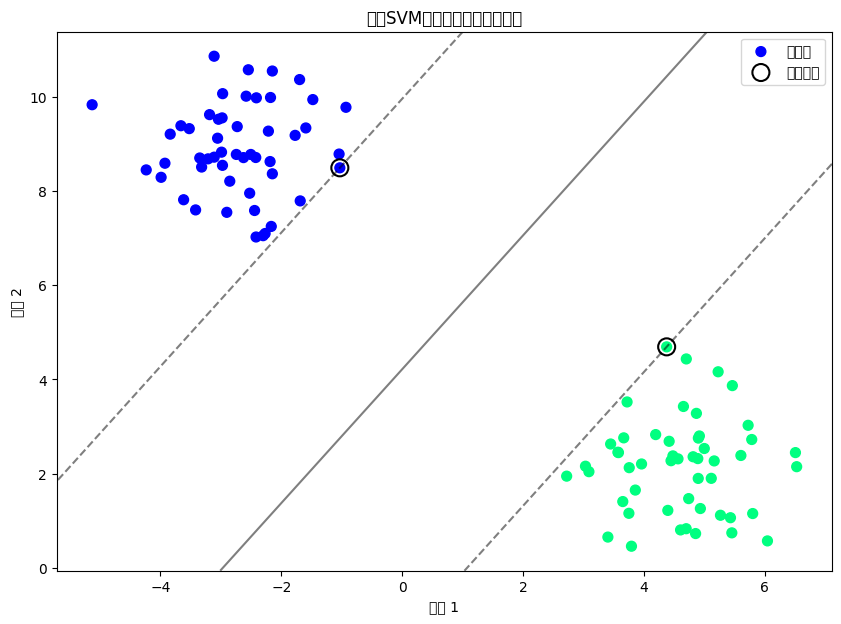

数据点总数: 100
支撑向量的数量: 2

观察图像：只有那些离黑线（决策边界）最近的点被黑色圆圈标记为支撑向量。
移动其他任何非支撑向量的点，决策边界不会改变。


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

print("="*60)
print("1. 演示: 什么是支撑向量 (Support Vectors)")
print("="*60)

# 创建一个线性可分的数据集
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# 训练一个线性SVM分类器
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

# 获取支撑向量
support_vectors = model.support_vectors_

# 绘制决策边界和支撑向量
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter', label='数据点')

# 绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

# 圈出支撑向量
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150,
            linewidth=1.5, facecolors='none', edgecolors='k', label='支撑向量')

plt.title('线性SVM的决策边界和支撑向量')
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.legend()
plt.show()

print(f"数据点总数: {len(X)}")
print(f"支撑向量的数量: {len(support_vectors)}")
print("\n观察图像：只有那些离黑线（决策边界）最近的点被黑色圆圈标记为支撑向量。")
print("移动其他任何非支撑向量的点，决策边界不会改变。")



In [17]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

print("\n" + "="*60)
print("2. 演示: 根据样本量大小选择分类器")
print("="*60)

def evaluate_models(n_samples):
    # 创建数据集
    X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=10, n_redundant=5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 简单模型：逻辑回归
    lr = LogisticRegression(max_iter=1000, solver='liblinear')
    lr.fit(X_train, y_train)
    lr_acc = accuracy_score(y_test, lr.predict(X_test))

    # 复杂模型：梯度提升决策树
    gbdt = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
    gbdt.fit(X_train, y_train)
    gbdt_acc = accuracy_score(y_test, gbdt.predict(X_test))

    print(f"--- 数据集大小: {n_samples} ---")
    print(f"  简单模型 (逻辑回归) 准确率: {lr_acc:.4f}")
    print(f"  复杂模型 (GBDT) 准确率   : {gbdt_acc:.4f}")
    if lr_acc > gbdt_acc:
        print("  结论: 简单模型表现更好或相当，复杂模型可能过拟合。")
    else:
        print("  结论: 复杂模型表现更好，因为它能从数据中学到更复杂的模式。")

# 场景一：小型数据集
evaluate_models(n_samples=200)

# 场景二：大型数据集
evaluate_models(n_samples=20000)


2. 演示: 根据样本量大小选择分类器
--- 数据集大小: 200 ---
  简单模型 (逻辑回归) 准确率: 0.8667
  复杂模型 (GBDT) 准确率   : 0.6167
  结论: 简单模型表现更好或相当，复杂模型可能过拟合。
--- 数据集大小: 20000 ---
  简单模型 (逻辑回归) 准确率: 0.8283
  复杂模型 (GBDT) 准确率   : 0.9600
  结论: 复杂模型表现更好，因为它能从数据中学到更复杂的模式。


In [18]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

print("\n" + "="*60)
print("3. 演示: Naive Bayes中的MLE vs MAP")
print("="*60)

# 训练数据：注意单词'rare_word'只出现在'spam'类别中
corpus = [
    'offer money money',
    'buy now money',
    'secret offer is here',
    'meeting today about your work',
    'work report is due',
    'lets meet today'
]
y_train = np.array(['spam', 'spam', 'spam', 'ham', 'ham', 'ham'])

# 将文本转换为词频向量
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(corpus)

# --- MLE (最大似然估计) ---
# 在scikit-learn中, alpha=0 且 fit_prior=False 模拟了纯粹的MLE
# 注意：alpha=0在实际中会因除零错误而失败，我们用一个极小值来模拟
try:
    mle_model = MultinomialNB(alpha=1e-10, fit_prior=False) # 模拟MLE
    mle_model.fit(X_train, y_train)

    # 测试句子包含一个在'ham'类别中从未见过的词 'rare_word'
    # 'rare_word' 在这里用 'money' 代替，因为它只在spam中出现
    test_sentence_mle = ['work report with money']
    X_test_mle = vectorizer.transform(test_sentence_mle)

    # 因为 P('money'|'ham') = 0, 所以整个后验概率会变成0
    print("--- MLE 模拟 ---")
    print(f"预测句子: '{test_sentence_mle[0]}'")
    print(f"预测概率 P(spam|sentence) vs P(ham|sentence): {mle_model.predict_proba(X_test_mle)}")
    print("结论: 尽管句子中有'work'和'report'，但由于'money'在ham类中概率为0，导致ham类的总概率为0。")

except Exception as e:
    print(f"MLE 模拟失败: {e}")


# --- MAP (最大后验估计) ---
# alpha=1 (默认值) 实现了拉普拉斯平滑, 这是MAP的一种形式
map_model = MultinomialNB(alpha=1.0)
map_model.fit(X_train, y_train)

# 同样的测试句子
test_sentence_map = ['work report with money']
X_test_map = vectorizer.transform(test_sentence_map)

print("\n--- MAP (拉普拉斯平滑) ---")
print(f"预测句子: '{test_sentence_map[0]}'")
print(f"预测概率 P(spam|sentence) vs P(ham|sentence): {map_model.predict_proba(X_test_map)}")
print(f"最终预测类别: '{map_model.predict(X_test_map)[0]}'")
print("结论: MAP通过平滑避免了零概率问题。尽管'money'在ham中没出现过，但它仍有一个很小的概率，使得模型能做出更合理的判断。")


3. 演示: Naive Bayes中的MLE vs MAP
--- MLE 模拟 ---
预测句子: 'work report with money'
预测概率 P(spam|sentence) vs P(ham|sentence): [[1.000e+00 2.592e-10]]
结论: 尽管句子中有'work'和'report'，但由于'money'在ham类中概率为0，导致ham类的总概率为0。

--- MAP (拉普拉斯平滑) ---
预测句子: 'work report with money'
预测概率 P(spam|sentence) vs P(ham|sentence): [[0.54565775 0.45434225]]
最终预测类别: 'ham'
结论: MAP通过平滑避免了零概率问题。尽管'money'在ham中没出现过，但它仍有一个很小的概率，使得模型能做出更合理的判断。



4. 演示: Linear vs. Non-linear SVM


/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


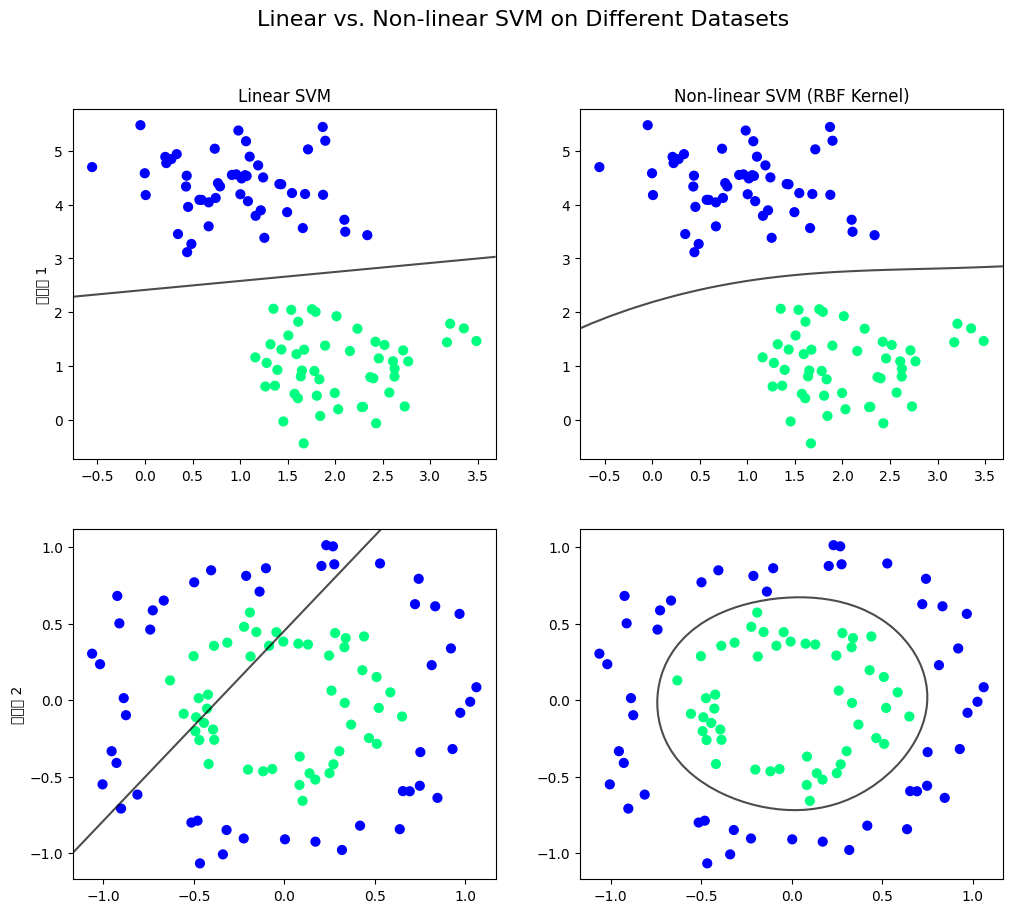

观察图像：
 - 对于数据集1（线性可分），线性和非线性SVM都能很好地工作。
 - 对于数据集2（环形），线性SVM完全无法分开数据，而带有RBF核的非线性SVM则能完美地画出圆形边界。


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.svm import SVC

print("\n" + "="*60)
print("4. 演示: Linear vs. Non-linear SVM")
print("="*60)

# 创建两个数据集：一个线性可分，一个非线性可分（环形）
datasets = [
    make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.6),
    make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=1)
]

# 创建两个模型：一个线性，一个非线性（RBF核）
models = [
    SVC(kernel='linear'),
    SVC(kernel='rbf')
]
titles = ['Linear SVM', 'Non-linear SVM (RBF Kernel)']

plt.figure(figsize=(12, 10))
plot_num = 1

for i, (X, y) in enumerate(datasets):
    for j, model in enumerate(models):
        plt.subplot(2, 2, plot_num)

        # 训练模型
        model.fit(X, y)

        # 绘制数据点
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='winter')

        # 绘制决策边界
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                             np.linspace(ylim[0], ylim[1], 50))
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.7, linestyles=['-'])

        if i == 0:
            plt.title(titles[j])

        if j == 0:
            plt.ylabel(f"数据集 {i+1}")

        plot_num += 1

plt.suptitle("Linear vs. Non-linear SVM on Different Datasets", fontsize=16)
plt.show()

print("观察图像：")
print(" - 对于数据集1（线性可分），线性和非线性SVM都能很好地工作。")
print(" - 对于数据集2（环形），线性SVM完全无法分开数据，而带有RBF核的非线性SVM则能完美地画出圆形边界。")

5. 演示: Kernel Function 的作用与使用时机

--- 场景1: 线性可分的数据 ---
在线性可分数据上，线性核SVM的准确率: 1.00
在线性可分数据上，RBF核SVM的准确率: 1.00
在线性可分数据上，线性和非线性核都能工作得很好。

--- 场景2: 非线性可分的数据 ---
在线性不可分数据上，线性核SVM的准确率: 0.87
在线性不可分数据上，RBF核SVM的准确率: 1.00
结论：线性核完全失败，而RBF核通过'核技巧'成功找到了非线性边界。


/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26680 (\N{CJK UNIFIED IDEOGRAPH-6838}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/p

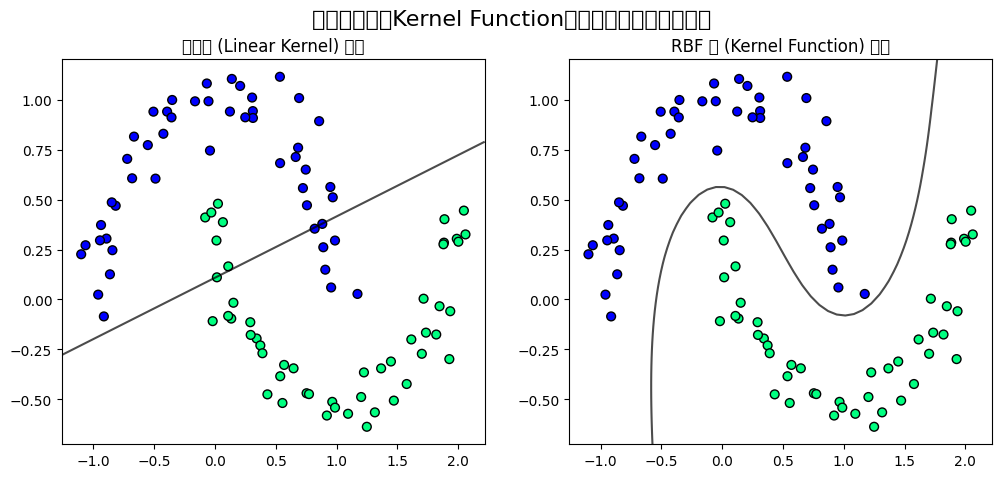

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.svm import SVC

print("="*60)
print("5. 演示: Kernel Function 的作用与使用时机")
print("="*60)

# 创建两个数据集：一个线性可分，一个非线性可分（月亮形）
X_linear, y_linear = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.6)
X_nonlinear, y_nonlinear = make_moons(n_samples=100, noise=0.1, random_state=0)

# 创建两个模型：一个使用线性核，一个使用非线性RBF核
linear_svm = SVC(kernel='linear', random_state=0)
rbf_svm = SVC(kernel='rbf', random_state=0) # RBF核是默认的非线性核

# --- 场景1: 线性可分数据 ---
print("\n--- 场景1: 线性可分的数据 ---")
linear_svm.fit(X_linear, y_linear)
rbf_svm.fit(X_linear, y_linear)
print(f"在线性可分数据上，线性核SVM的准确率: {linear_svm.score(X_linear, y_linear):.2f}")
print(f"在线性可分数据上，RBF核SVM的准确率: {rbf_svm.score(X_linear, y_linear):.2f}")
print("在线性可分数据上，线性和非线性核都能工作得很好。")

# --- 场景2: 非线性可分数据 ---
print("\n--- 场景2: 非线性可分的数据 ---")
linear_svm_nonlinear = SVC(kernel='linear', random_state=0).fit(X_nonlinear, y_nonlinear)
rbf_svm_nonlinear = SVC(kernel='rbf', random_state=0).fit(X_nonlinear, y_nonlinear)

# 获取模型在新数据上的准确率来量化表现
linear_score = linear_svm_nonlinear.score(X_nonlinear, y_nonlinear)
rbf_score = rbf_svm_nonlinear.score(X_nonlinear, y_nonlinear)

print(f"在线性不可分数据上，线性核SVM的准确率: {linear_score:.2f}")
print(f"在线性不可分数据上，RBF核SVM的准确率: {rbf_score:.2f}")
print("结论：线性核完全失败，而RBF核通过'核技巧'成功找到了非线性边界。")


# 辅助函数：用于可视化决策边界
def plot_boundary(ax, model, X, y, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='winter', edgecolors='k')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.7, linestyles=['-'])
    ax.set_title(title)

# 可视化对比
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_boundary(axes[0], linear_svm_nonlinear, X_nonlinear, y_nonlinear, "线性核 (Linear Kernel) 失败")
plot_boundary(axes[1], rbf_svm_nonlinear, X_nonlinear, y_nonlinear, "RBF 核 (Kernel Function) 成功")
fig.suptitle("什么时候使用Kernel Function？当数据线性不可分时！", fontsize=16)
plt.show()


6. 演示: Log Loss vs. Hinge Loss


/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mapleandrew/.pyenv/versions/3.12.10/lib/p

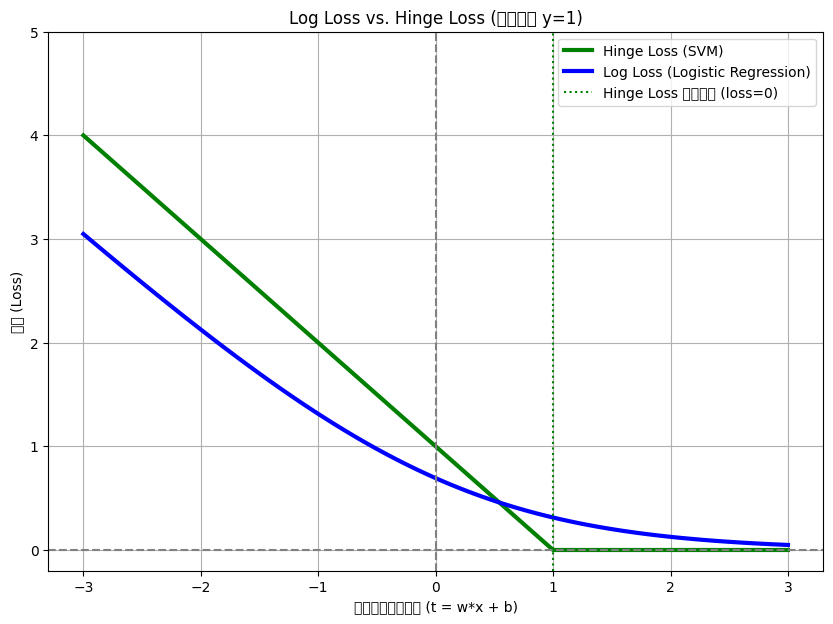

观察图像：
 - Hinge Loss (绿色): 当得分 t >= 1 时，损失为0。模型认为预测'足够好'，不再惩罚。
 - Log Loss (蓝色): 是一条平滑曲线，即使得分 t 很高，损失也只是无限接近0，但永远不会等于0。它总在鼓励模型更'自信'。
 - 当模型做出错误预测 (t < 0) 时，Log Loss的惩罚增长比Hinge Loss快得多。


In [23]:
import numpy as np
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("6. 演示: Log Loss vs. Hinge Loss")
print("="*60)

# 假设真实标签 y = +1
# 横轴是模型的原始输出得分 t = w*x + b
t = np.linspace(-3, 3, 100)

# Hinge Loss = max(0, 1 - y*t)  (这里y=1, 所以是 1-t)
hinge_loss = np.maximum(0, 1 - t)

# Log Loss 需要将原始得分 t 转换为概率 p
# p = sigmoid(t)
p = 1 / (1 + np.exp(-t))
# Log Loss = -log(p) (因为 y=1)
log_loss = -np.log(p)

plt.figure(figsize=(10, 7))
plt.plot(t, hinge_loss, label='Hinge Loss (SVM)', linewidth=3, color='green')
plt.plot(t, log_loss, label='Log Loss (Logistic Regression)', linewidth=3, color='blue')

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.axvline(1, color='green', linestyle=':', label='Hinge Loss 安全间隔 (loss=0)')

plt.title('Log Loss vs. Hinge Loss (真实标签 y=1)')
plt.xlabel('模型原始输出得分 (t = w*x + b)')
plt.ylabel('损失 (Loss)')
plt.legend()
plt.grid(True)
plt.ylim(-0.2, 5)
plt.show()

print("观察图像：")
print(" - Hinge Loss (绿色): 当得分 t >= 1 时，损失为0。模型认为预测'足够好'，不再惩罚。")
print(" - Log Loss (蓝色): 是一条平滑曲线，即使得分 t 很高，损失也只是无限接近0，但永远不会等于0。它总在鼓励模型更'自信'。")
print(" - 当模型做出错误预测 (t < 0) 时，Log Loss的惩罚增长比Hinge Loss快得多。")

In [24]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

print("\n" + "="*60)
print("7. 演示: KNN 是监督学习")
print("="*60)

# 创建一个带标签的数据集
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# --- KNN (监督学习) ---
print("--- KNN (K-近邻) ---")
knn = KNeighborsClassifier(n_neighbors=3)

# 注意：.fit() 方法需要 X (特征) 和 y (标签)
print("调用 knn.fit(X, y)...")
knn.fit(X, y)
print("KNN需要标签(y)进行训练，因为它要学习特征和标签之间的关系。")

# 预测一个新点
new_point = np.array([[-8, 0]])
prediction = knn.predict(new_point)
print(f"对新点 {new_point} 的预测类别是: {prediction[0]} (基于邻居的标签投票)")
print("=> KNN 是监督学习。\n")


# --- K-Means (无监督学习) 作为对比 ---
print("--- K-Means (K-均值) 作为对比 ---")
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

# 注意：.fit() 方法只需要 X (特征)，不需要 y (标签)
print("调用 kmeans.fit(X)...")
kmeans.fit(X)
print("K-Means不需要标签(y)，因为它只是在数据中寻找结构（簇）。")

# 预测一个新点属于哪个簇
cluster = kmeans.predict(new_point)
print(f"新点 {new_point} 被分配到的簇是: {cluster[0]} (基于离哪个簇中心最近)")
print("=> K-Means 是无监督学习。")


7. 演示: KNN 是监督学习
--- KNN (K-近邻) ---
调用 knn.fit(X, y)...
KNN需要标签(y)进行训练，因为它要学习特征和标签之间的关系。
对新点 [[-8  0]] 的预测类别是: 2 (基于邻居的标签投票)
=> KNN 是监督学习。

--- K-Means (K-均值) 作为对比 ---
调用 kmeans.fit(X)...
K-Means不需要标签(y)，因为它只是在数据中寻找结构（簇）。
新点 [[-8  0]] 被分配到的簇是: 1 (基于离哪个簇中心最近)
=> K-Means 是无监督学习。


In [25]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

print("\n" + "="*60)
print("8. 演示: Naive Bayes的参数与'朴素'假设")
print("="*60)

# 简单的训练数据
corpus = [
    'free money offer',
    'urgent money prize',
    'work report meeting',
    'project meeting today'
]
y_train = np.array(['spam', 'spam', 'ham', 'ham'])

# 将文本转换为词频向量
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()

# 训练模型 (使用拉普拉斯平滑 alpha=1)
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

# --- 1. 查看模型参数 ---
print("--- 1. Naive Bayes 的参数 ---")
# a) 类别先验概率 P(C)
class_priors = np.exp(model.class_log_prior_)
print(f"类别先验概率 P(C):")
for i, class_name in enumerate(model.classes_):
    print(f"  P({class_name}) = {class_priors[i]:.4f}")

# b) 特征条件概率 P(Feature|C)
feature_probs = np.exp(model.feature_log_prob_)
feature_probs_df = pd.DataFrame(feature_probs, columns=vocab, index=model.classes_)
print("\n特征条件概率 P(Feature|C):")
print(feature_probs_df.round(4))
print("\n这些概率就是模型从数据中学习到的所有'参数'。")

# --- 2. 解释'朴素'假设 ---
print("\n--- 2. 为什么是'Naïve' (朴素的)？ ---")
# 计算 P('free money' | 'spam')
p_free_given_spam = feature_probs_df.loc['spam', 'free']
p_money_given_spam = feature_probs_df.loc['spam', 'money']

# 根据朴素假设，联合概率是条件概率的乘积
p_naive_product = p_free_given_spam * p_money_given_spam

print("考虑一个短语 'free money'，我们要计算 P('free money' | spam)。")
print(f"在现实中，'free' 和 'money' 这两个词在垃圾邮件中是高度相关的。")
print("但朴素贝叶斯'天真'地假设它们是独立的，因此它这样计算:")
print(f"P('free', 'money'|spam) ≈ P('free'|spam) * P('money'|spam)")
print(f"                         ≈ {p_free_given_spam:.4f} * {p_money_given_spam:.4f} = {p_naive_product:.4f}")
print("这个'特征条件独立'的假设在现实中几乎总是不成立的，这就是它被称为'朴素'的原因。")


8. 演示: Naive Bayes的参数与'朴素'假设
--- 1. Naive Bayes 的参数 ---
类别先验概率 P(C):
  P(ham) = 0.5000
  P(spam) = 0.5000

特征条件概率 P(Feature|C):
        free  meeting   money   offer   prize  project  report   today  \
ham   0.0625   0.1875  0.0625  0.0625  0.0625   0.1250  0.1250  0.1250   
spam  0.1250   0.0625  0.1875  0.1250  0.1250   0.0625  0.0625  0.0625   

      urgent    work  
ham   0.0625  0.1250  
spam  0.1250  0.0625  

这些概率就是模型从数据中学习到的所有'参数'。

--- 2. 为什么是'Naïve' (朴素的)？ ---
考虑一个短语 'free money'，我们要计算 P('free money' | spam)。
在现实中，'free' 和 'money' 这两个词在垃圾邮件中是高度相关的。
但朴素贝叶斯'天真'地假设它们是独立的，因此它这样计算:
P('free', 'money'|spam) ≈ P('free'|spam) * P('money'|spam)
                         ≈ 0.1250 * 0.1875 = 0.0234
这个'特征条件独立'的假设在现实中几乎总是不成立的，这就是它被称为'朴素'的原因。


### Extra

好的，这是一个在朴素贝叶斯和许多其他概率模型中至关重要的概念。

简单来说，**拉普拉斯平滑 (Laplace Smoothing)** 是一种用来**解决概率模型中“零概率问题”** 的技术。

它的核心思想非常简单：在进行概率统计之前，我们先假装**“每个可能出现的结果都至少出现过一次”**。

---

### 一、 为什么需要平滑？—— 致命的“零概率问题”

在像朴素贝叶斯这样的模型中，我们需要计算很多概率，尤其是条件概率，比如 $P(\text{某个词} | \text{某个类别})$。这些概率通常是通过**最大似然估计 (MLE)** 计算的，也就是直接用频率来估计概率。

$$
P(\text{词w} | \text{类别c}) = \frac{\text{在类别c的文档中，词w出现的次数}}{\text{在类别c的文档中，所有词的总数}}
$$

这里有一个致命的问题：如果在你的**训练集**中，某个词（例如“元宇宙”）从未在某个类别（例如“体育新闻”）中出现过，会发生什么？

根据上面的公式，它的概率就是：
$$
P(\text{“元宇宙”} | \text{“体育”}) = \frac{0}{\text{体育类总词数}} = 0
$$

现在，来了一篇新的、需要预测的体育新闻，里面恰好包含了“元宇宙”这个词。根据朴素贝叶斯的连乘公式，计算这篇文章属于“体育”的总概率时：
$$
P(\text{“体育”} | \text{文章}) \propto P(\text{“体育”}) \times P(\text{词1}|\text{“体育”}) \times \dots \times \underbrace{P(\text{“元宇宙”}|\text{“体育”})}_{=0} \times \dots
$$
因为其中一项概率是0，整个乘积就变成了**0**！

这意味着，仅仅因为一个在训练集中未见过的词，模型就 100% 排除了这篇文章属于“体育”的可能性，这显然是极其不合理的。这就是**零概率问题 (Zero-Frequency Problem)**。

---

### 二、 拉普拉斯平滑如何解决问题？

拉普拉斯平滑通过一个简单的“作弊”手段解决了这个问题。它也被称为**加法平滑 (Additive Smoothing)**。

它的做法是：在计算概率时，给**分子加上一个小的平滑值 $\alpha$**，同时为了保证所有概率加起来仍然等于1，给**分母加上 $\alpha$ 乘以可能结果的总数 V**。

修改后的公式变为：
$$
P(\text{词w} | \text{类别c}) = \frac{\text{在类别c的文档中，词w出现的次数} + \alpha}{\text{在类别c的文档中，所有词的总数} + \alpha \cdot V}
$$

* **$\alpha$ (alpha)**：平滑参数。
    * 当 **$\alpha = 1$** 时，就是标准的**拉普拉斯平滑**。这相当于我们**假设每个词在每个类别中都预先出现过1次**。
    * 当 $0 < \alpha < 1$ 时，称为** Lidstone 平滑**。
* **$V$**：特征的总数。在自然语言处理中，这通常是**词汇表 (Vocabulary) 的大小**，即所有不重复单词的总数。

#### 举个例子：

回到刚才的问题，假设“体育”类新闻共有10000个词，词汇表大小为50000。我们使用拉普拉斯平滑（$\alpha=1$）。

* **平滑前 (MLE)**:
    $$
    P(\text{“元宇宙”} | \text{“体育”}) = \frac{0}{10000} = 0
    $$

* **平滑后 (MAP)**:
    $$
    P(\text{“元宇宙”} | \text{“体育”}) = \frac{0 + 1}{10000 + 1 \cdot 50000} = \frac{1}{60000}
    $$

看！现在这个概率虽然非常小，但它**不再是0了**。这就使得即使出现训练集中未见的词，模型依然能正常工作，不会让整个计算崩溃。

---

### 三、 与MAP的关系

拉普拉斯平滑实际上是**最大后验估计 (MAP)** 的一种特殊情况。

* **MLE (最大似然估计)**：完全相信数据，数据说什么就是什么。
* **MAP (最大后验估计)**：在相信数据的同时，也带有一个**先验信念 (Prior Belief)**。

拉普拉斯平滑引入的“假设每个词都出现过 $\alpha$ 次”就是一种先验信念。这个信念是：**任何事情都不是完全不可能发生的**。通过将这个先验信念与数据（似然）结合，我们得到了一个更稳健的后验估计。

---

### 总结

| 特性 | 描述 |
| :--- | :--- |
| **目的** | 解决概率模型中的**零概率问题**，防止因个别未见过的特征导致整体概率为零。 |
| **核心思想** | 在统计次数前，**假装每个可能的结果都预先出现过 $\alpha$ 次** (通常是1次)。 |
| **如何实现** | 分子加 $\alpha$，分母加 $\alpha \cdot V$ (V是特征总数)。 |
| **本质** | 是**最大后验估计 (MAP)** 的一种形式，引入了“一切皆有可能”的先验信念。 |
| **作用** | 1. 避免零概率。<br>2. 是一种**正则化 (Regularization)** 技术，可以防止模型在小数据集上过拟合。 |

**一句话总结：**
拉普拉斯平滑就是一种给概率“兜底”的方法，它通过给从未出现过的事件一个非常小的概率，来确保模型在面对新情况时不会因为“没见过”就直接崩溃。